# Plant seedling classification

* competition : https://www.kaggle.com/c/plant-seedlings-classification/data
* downlaod data in data/

## I.Initial exploration

In [2]:
import os
os.listdir('data/')

['train.zip',
 'sample_submission.csv',
 'test',
 'sample_submission.csv.zip',
 'train',
 'test.zip']

### Sample submission

In [3]:
import pandas as pd
df_sub=pd.read_csv('data/sample_submission.csv')
print(df_sub.shape)
df_sub.head()

(794, 2)


,file,species
0,0021e90e4.png,Sugar beet
1,003d61042.png,Sugar beet
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Sugar beet
4,00c47e980.png,Sugar beet


### Data

In [4]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


##### Creating validation set

In [6]:
from random import shuffle
from shutil import copyfile
from math import floor
PATH_Train = 'data/train/'
PATH_dest = 'data/train_modified/'
r= 0.2

if not os.path.isdir(PATH_dest):
    
    #set up folders
    os.makedirs(PATH_dest)
    os.makedirs(PATH_dest+'train')
    os.makedirs(PATH_dest+'val')
    classes=os.listdir(PATH_Train)
    for c in classes:
        os.makedirs(PATH_dest+'train/'+c)
        os.makedirs(PATH_dest+'val/'+c)
    
    #get examples
    examples=list()
    for c in classes:
        examples+=[(c,_) for _ in os.listdir(f'{PATH_Train}{c}/')]
    nb_val=floor(len(examples)*r)
    
    #copy examples to val/test
    shuffle(examples)
    for ex in examples[:nb_val]:
        copyfile('{}{}/{}'.format(PATH_Train,ex[0],ex[1]),'{}/val/{}/{}'.format(PATH_dest,ex[0],ex[1]))
    for ex in examples[nb_val:]:
        copyfile('{}{}/{}'.format(PATH_Train,ex[0],ex[1]),'{}/train/{}/{}'.format(PATH_dest,ex[0],ex[1]))

In [25]:
arch=resnet34
sz=224
bs=64
data = ImageClassifierData.from_paths('',trn_name='data/train_modified/train',\
                                      val_name='data/train_modified/val', test_name='data/test',tfms=tfms_from_model(arch, sz))

In [26]:
def plots_ims(ims,figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

950 training examples
3800 validation examples


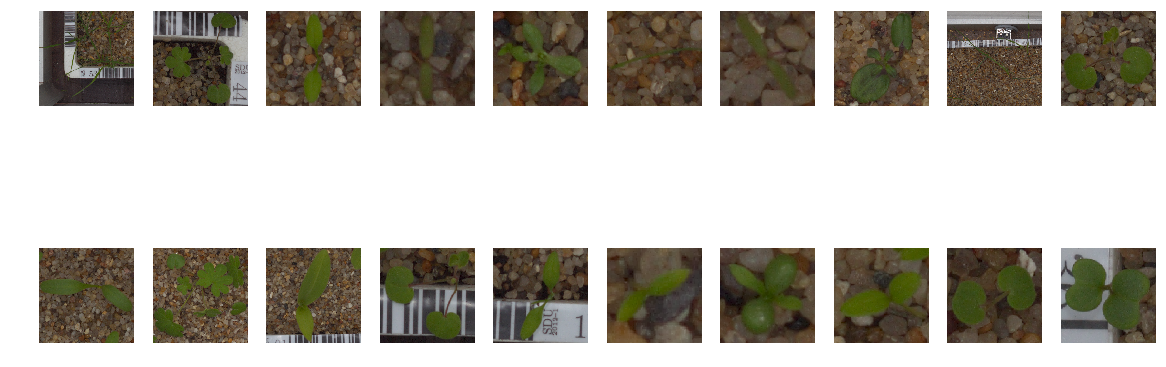

In [36]:
print(f'{len(data.val_ds.fnames)} training examples')
print(f'{len(data.trn_ds.fnames)} validation examples')

idx=np.random.permutation(len(data.val_ds.fnames))
type(data.val_ds.fnames)
img=[plt.imread(data.val_ds.fnames[i]) for i in idx[:20]]
plots_ims(img,figsize=(20,8),rows=2)
